# 02: Cluster analysis: K-means

**Author:** Grace Akatsu

**Class:** CPBS 7602, Fall 2025

---
## Overview
This notebook performs cluster analysis on the GTEx data from notebook 01, using k-means clustering.

## Table of Contents
*   [Import libraries](#import_libraries)
*   [Set paths and seed](#set_paths)
*   [Read in data](#read_data)
*   [Parameter tuning: consensus index method](#consensus_index)
*   [Parameter tuning: elbow method](#elbow)
*   [Visualize with PCA](#PCA)
*   [Save model outputs for k=10](#k_10)
---

## Import libraries <a class="anchor" id="import_libraries"></a>

In [42]:
import os
import numpy as np
import pandas as pd
from sklearn import cluster
from sklearn.metrics import adjusted_rand_score as ari
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Set paths and seed <a class="anchor" id="set_paths"></a>

In [17]:
DATA_FILE = "/Users/akatsug/OneDrive - The University of Colorado Denver/CPBS_7602_big_data_in_biomedical_informatics/assignment01/clean_data/gtex_top10_tissues_top5000_variable_genes_standardized.csv"
K_MEANS_OUTPUTS = "/Users/akatsug/OneDrive - The University of Colorado Denver/CPBS_7602_big_data_in_biomedical_informatics/assignment01/k_means_outputs"

os.makedirs(K_MEANS_OUTPUTS, exist_ok=True)

In [18]:
np.random.seed(0)

## Read in data <a class="anchor" id="read_data"></a>

In [19]:
data = pd.read_csv(
    DATA_FILE,
    index_col="SAMPID"
)

data.head()


,Tissue,ENSG00000244734.3,ENSG00000188536.12,ENSG00000198804.2,ENSG00000198938.2,ENSG00000163220.10,ENSG00000198899.2,ENSG00000198886.2,ENSG00000198712.1,ENSG00000143632.14,...,ENSG00000261236.7,ENSG00000188112.8,ENSG00000170035.15,ENSG00000024862.17,ENSG00000213619.9,ENSG00000176087.14,ENSG00000115596.3,ENSG00000138386.16,ENSG00000182872.15,ENSG00000070669.16
SAMPID,,,,,,,,,,,,,,,,,,,,,
GTEX-1117F-0226-SM-5GZZ7,Adipose - Subcutaneous,-0.317682,-0.320624,-0.822484,-0.623593,-0.278153,-0.845429,-0.920044,-0.944370,-0.332153,...,-0.259958,0.087855,0.714803,0.769940,0.143898,-0.476630,-0.245165,-0.547999,-0.027921,-0.037272
GTEX-1117F-0426-SM-5EGHI,Muscle - Skeletal,-0.319849,-0.322180,0.219063,1.660759,-0.278587,1.286640,0.307966,0.663645,1.117576,...,1.470513,-0.589025,-0.033767,-0.572090,0.467826,-0.715005,-0.381079,-1.292842,-0.339644,-1.050707
GTEX-1117F-0526-SM-5EGHJ,Artery - Tibial,-0.319430,-0.321842,-0.872736,-0.647149,-0.278998,-0.710659,-0.839425,-0.911312,-0.332987,...,-0.509545,-0.527738,-0.000939,-0.229877,-0.396138,-1.214898,-0.315997,-0.447965,1.078165,0.048887
GTEX-1117F-2926-SM-5GZYI,Skin - Not Sun Exposed (Suprapubic),-0.320043,-0.321507,-0.525812,-0.609139,-0.276681,-0.633970,-0.646396,-0.870145,-0.332046,...,-0.344541,0.708257,-0.008799,0.094763,-0.049997,-0.492368,-0.070677,1.017824,0.276392,0.139678
GTEX-111CU-0226-SM-5GZXC,Thyroid,-0.321842,-0.323617,-0.064829,0.022578,-0.267405,0.605461,0.046808,0.438473,-0.332147,...,0.941758,0.128075,0.421663,0.986367,0.335941,1.521090,-0.368260,-0.127483,0.448233,5.554269


In [20]:
# Set input
X = data.drop(columns=["Tissue"])
# Set target
y = data["Tissue"]

## Parameter tuning: consensus index method <a class="anchor" id="consensus_index"></a>

In [21]:
# Let's use the consensus index method to determine the optimal number of clusters (k) for K-means clustering.

Ks = range(2, 20)
n_reps = 10
cluster_labels = []
pairwise_ari = []
centroid_positions = {}
stability_scores = []

for k in Ks:
    labels = []
    centroids = []

    for _ in range(n_reps):
        model = cluster.KMeans(n_clusters=k, n_init="auto")
        labels.append(model.fit_predict(X))
        centroids.append(model.cluster_centers_)

    cluster_labels.append(labels)
    centroid_positions[k] = centroids

    # Compute pairwise adjusted Rand index (ARI) for stability
    ari_distances = pdist(labels, metric=ari)
    pairwise_ari.append(ari_distances)
    stability_scores.append(ari_distances.mean())



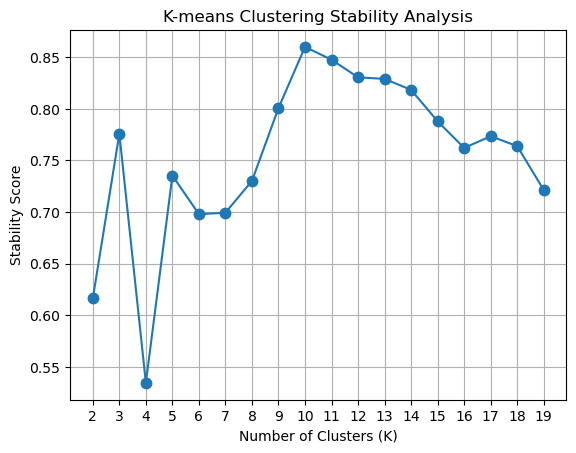

In [28]:
# Visualize stability scores
plt.plot(Ks, stability_scores, marker=".", linestyle="-", markersize=15)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Stability Score")
plt.grid(True)
plt.xticks(range(Ks[0], Ks[-1] + 1))
plt.title("K-means Clustering Stability Analysis")
plt.show()

We can see that the stability score peaks when K = 10. We are hoping to cluster by tissue type, and there are 10 tissues represented in this data, so this is promising.

## Parameter tuning: elbow method <a class="anchor" id="elbow"></a>

In [29]:
# Use elbow method to visualize objective (loss) function values for different K values

Ks, objs = range(1, 20), []
for k in Ks:
    model = cluster.KMeans(n_clusters=k, n_init="auto")
    model.fit(X)
    objs.append(-model.score(X) / X.shape[0])

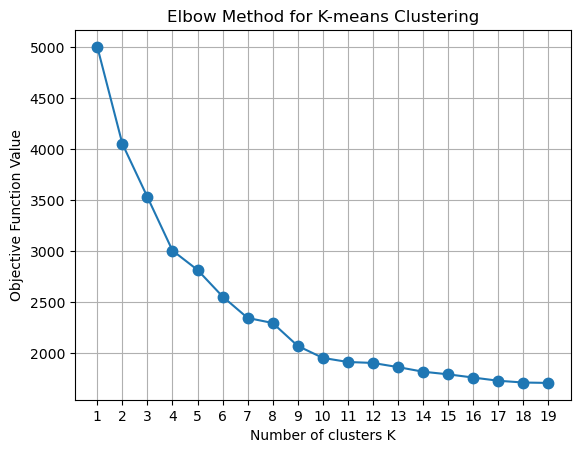

In [33]:
# Visualize
plt.plot(Ks, objs, ".-", markersize=15)
plt.xlabel("Number of clusters K")
plt.ylabel("Objective Function Value")
plt.title("Elbow Method for K-means Clustering")
plt.grid(True)
plt.xticks(range(Ks[0], Ks[-1] + 1))
plt.show()

The elbow method is subjective, but I see elbows at both 4 and 8. Neither of these corresponds to the number of tissue types we are hoping to capture, which is 10.

## Visualize with PCA <a class="anchor" id="PCA"></a>

Visualize with PCA to see where the centroids of the identified clusters are when K = 4, 8, and 10.

In [36]:
# Train models for K = 4, 8, and 10
selected_Ks = [4, 8, 10]

kmeans_models = {}
for k in selected_Ks:
    model = cluster.KMeans(n_clusters=k, n_init="auto")
    model.fit(X)
    kmeans_models[k] = model  

In [41]:
# Get the cluster centers for K = 4, 8, and 10
centroids_K4 = kmeans_models[4].cluster_centers_
centroids_K8 = kmeans_models[8].cluster_centers_
centroids_K10 = kmeans_models[10].cluster_centers_

In [79]:
# Perform PCA for visualization 
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X)


In [81]:
# Project the centroids into PCA space
centroids_K4_pca = pca.transform(centroids_K4)
centroids_K8_pca = pca.transform(centroids_K8)
centroids_K10_pca = pca.transform(centroids_K10)


/Users/akatsug/miniforge3/envs/cu-cpbs-7602/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/Users/akatsug/miniforge3/envs/cu-cpbs-7602/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/Users/akatsug/miniforge3/envs/cu-cpbs-7602/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


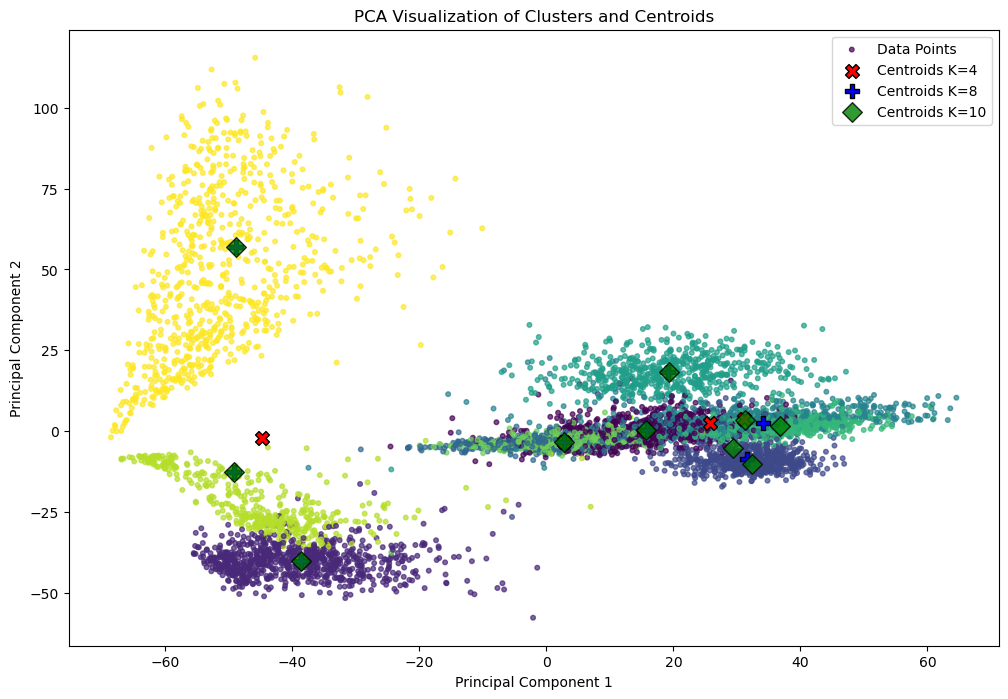

In [102]:
# Visualize PCA results with centroids, colored by true tissue type of origin

# Map Tissue type to numbers for coloring
tissue_numbers = []
for tissue in data["Tissue"].tolist():
    tissue_numbers.append(data["Tissue"].unique().tolist().index(tissue))

plt.figure(figsize=(12, 8))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=tissue_numbers, s=11, alpha=0.7, label='Data Points')
plt.scatter(centroids_K4_pca[:, 0], centroids_K4_pca[:, 1], c='red', s=100, marker='X', edgecolors='black', label='Centroids K=4')
plt.scatter(centroids_K8_pca[:, 0], centroids_K8_pca[:, 1], c='blue', s=100, marker='P', edgecolors='black', label='Centroids K=8')
plt.scatter(centroids_K10_pca[:, 0], centroids_K10_pca[:, 1], c='green', s=100, marker='D', edgecolors='black', alpha=0.8, label='Centroids K=10')      
plt.legend()
plt.title('PCA Visualization of Clusters and Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Despite what the elbow method seemed to demonstrate, I will go with k=10 as that seems to be what best fits the data based on subjective assessment of PCA visualization.

## Save model outputs for k=10 <a class="anchor" id="k_10"></a>

In [104]:
final_model = cluster.KMeans(n_clusters=10, n_init="auto")
final_model.fit(X)

KMeans(n_clusters=10)

In [ ]:
# to save - cluster assignments, and anything else needed for assessment (see below)


Check out different resources and documentation from sklearn.

* [Clustering guide](https://scikit-learn.org/1.5/modules/clustering.html) from sklearn:
  * Introduction to **different clustering methods**.
  * Clustering **performance evaluation**:
    * **When we know** the ground-truth (external metrics):
      * Based on Rand Index, such as ARI.
      * Based on mutual information, such as NMI.
    * **When we don't know** the ground-truth (internal metrics):
      * Silhouette coefficient
      * Calinski-Harabasz Index
      * Davies-Bouldin Index